In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
df_elec = pd.read_csv('electricity_010123.csv')
df_gas = pd.read_csv('gas_010123.csv')

df_gas["date"] = pd.to_datetime(df_gas[" Start"], utc=True).dt.date 
df_gas["Consumption (kWh)"] = df_gas["Consumption (m³)"] * 1.02264 * 39.1/3.6
df_gas.drop("Consumption (m³)", axis=1, inplace=True)
df_gas = df_gas.groupby("date").sum()

df_elec["date"] = pd.to_datetime(df_elec[" Start"], utc=True).dt.date
df_elec = df_elec.groupby("date").sum()


array([[<AxesSubplot: title={'center': 'Consumption (kWh)'}>]],
      dtype=object)

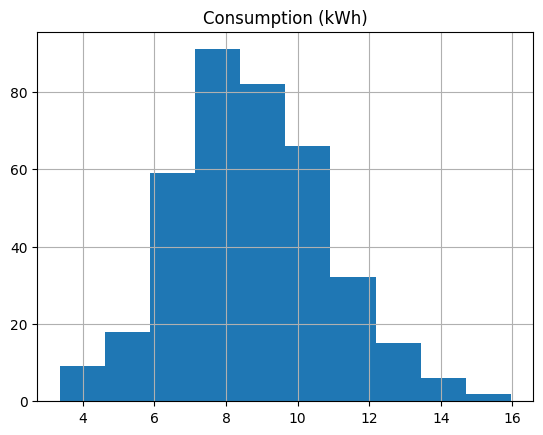

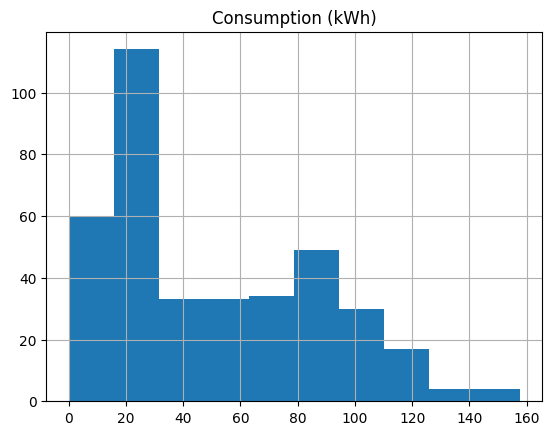

In [3]:
df_elec.hist()
df_gas.hist()

In [4]:
df = df_gas.join(df_elec,lsuffix="_g", rsuffix="_e")
df.columns = ["Gas", "Electricity"]
df

,Gas,Electricity
date,,
2023-01-01,59.278095,9.109
2023-01-02,59.478021,7.714
2023-01-03,97.341806,10.620
2023-01-04,65.820122,9.606
2023-01-05,55.401749,8.804
...,...,...
2024-01-11,124.131907,8.284
2024-01-12,105.238888,11.396
2024-01-13,97.386234,8.824


In [5]:
df.to_excel("data_export.xlsx")

In [6]:
df_weekly = df.copy()
df_weekly["W/C"] = pd.to_datetime(df.index.to_series()).dt.to_period('W').dt.start_time
df_weekly["W/C"] = df_weekly["W/C"].dt.date
df_weekly = df_weekly.groupby(by="W/C", as_index=False).sum().set_index("W/C")
df_weekly.to_excel("weekly_readings.xlsx")
df_weekly

,Gas,Electricity
W/C,,
2022-12-26,59.278095,9.109
2023-01-02,503.280686,61.642
2023-01-09,606.031605,63.208
2023-01-16,909.241780,58.737
2023-01-23,747.723689,60.171
2023-01-30,534.180379,64.120
2023-02-06,651.303764,60.917
2023-02-13,435.039237,60.201
2023-02-20,593.203012,58.980


In [7]:
df_weather = pd.read_excel("weather_data.xlsx")
df_weather["date"] = df_weather["date"].dt.date

df = df.merge(df_weather,on="date").set_index("date")
df

,Gas,Electricity,temp
date,,,
2023-01-01,59.278095,9.109,8.6
2023-01-02,59.478021,7.714,5.3
2023-01-03,97.341806,10.620,6.1
2023-01-04,65.820122,9.606,9.9
2023-01-05,55.401749,8.804,10.1
...,...,...,...
2024-01-11,124.131907,8.284,3.4
2024-01-12,105.238888,11.396,3.6
2024-01-13,97.386234,8.824,3.2


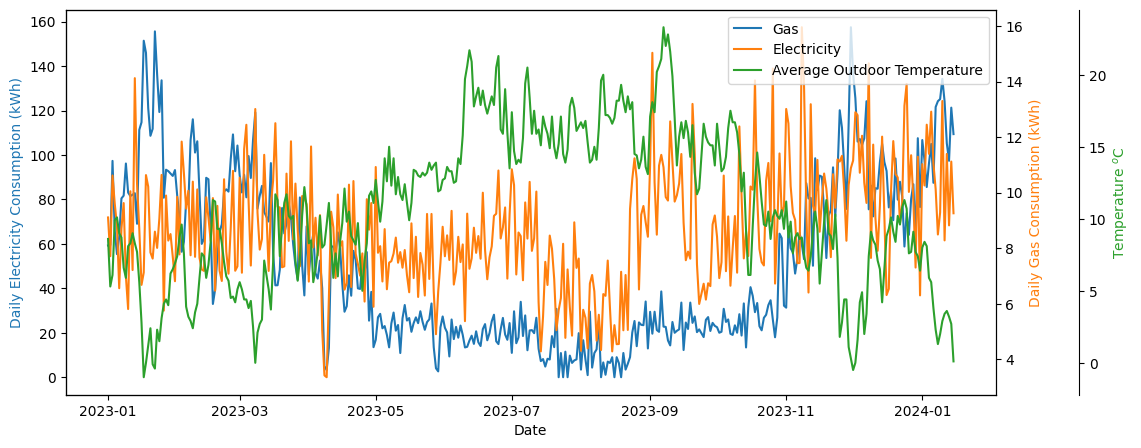

In [8]:
fig, ax1 = plt.subplots(1,1,figsize=(12, 5))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

g = ax1.plot(df.index, df["Gas"], label = "Gas", color="C0")
e = ax2.plot(df.index, df["Electricity"], label = "Electricity", color="C1")
w = ax3.plot(df.index, df["temp"], label="Average Outdoor Temperature", color="C2")

ax1.set_xlabel("Date")
ax1.set_ylabel("Daily Electricity Consumption (kWh)")
ax2.set_ylabel("Daily Gas Consumption (kWh)")
ax3.set_ylabel("Temperature $^o$C")

ax3.spines['right'].set_position(('outward', 60))

plt.legend(handles=g+e+w, loc='best')

ax1.yaxis.label.set_color(g[0].get_color())
ax2.yaxis.label.set_color(e[0].get_color())
ax3.yaxis.label.set_color(w[0].get_color());

# Electricity Analytics

In [9]:
print(f'Correlation Coefficient of Temperature vs Electricity Consumption {round(df["Electricity"].corr(df["temp"]), 3)}')

Correlation Coefficient of Temperature vs Electricity Consumption -0.254


{'R2 score: 0.065'}
coeff: [-0.10216452] intercept: 9.831231197235372


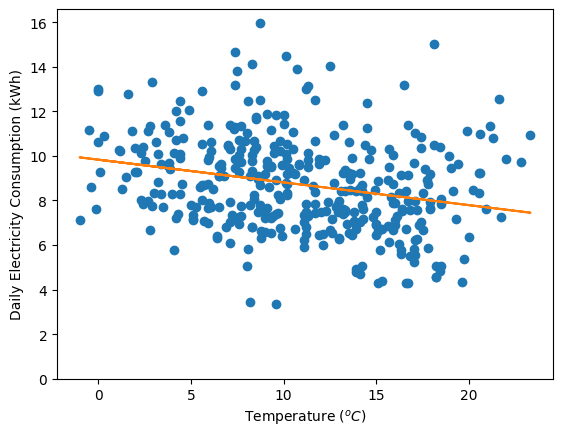

In [10]:
lr_elec = LinearRegression()
lr_elec.fit(df["temp"].values.reshape(-1, 1), df["Electricity"])

plt.scatter(df["temp"], df["Electricity"])
plt.plot(df["temp"], lr_elec.predict(df["temp"].values.reshape(-1, 1)), color="C1")
plt.xlabel("Temperature ($^oC$)")
plt.ylabel("Daily Electricity Consumption (kWh)")
plt.ylim(0)
print({f'R2 score: {round(lr_elec.score(df["temp"].values.reshape(-1, 1), df["Electricity"]),3)}'})
print(f"coeff: {lr_elec.coef_} intercept: {lr_elec.intercept_}")

In [11]:
mean_elec, std_elec = df["Electricity"].mean(), df["Electricity"].std()
cutoff_elec = std_elec * 3
df_elec_weather = df[["Electricity", "temp"]]
df_elec_weather = df_elec_weather[
    (df_elec_weather["Electricity"]>mean_elec-std_elec) & (df_elec_weather["Electricity"]<mean_elec+std_elec)
    ]
print(std_elec/ mean_elec)

0.24278923049700205


In [12]:
print(f'Correlation Coefficient of Temperature vs Electricity Consumption (within 3 std): {round(df_elec_weather["Electricity"].corr(df_elec_weather["temp"]),3)}')

Correlation Coefficient of Temperature vs Electricity Consumption (within 3 std): -0.144


R2 Score: -0.08


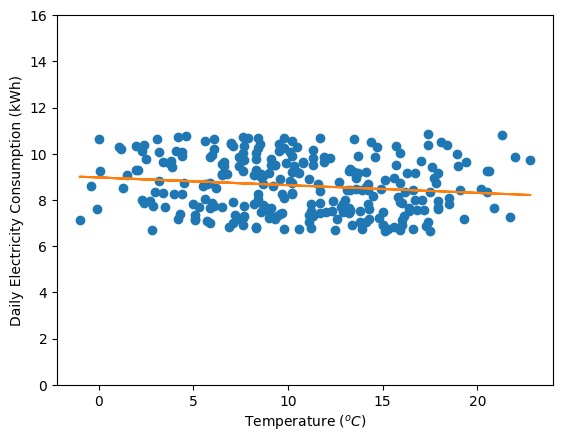

In [13]:
lr_elec_clean = LinearRegression()
lr_elec_clean.fit(df_elec_weather["temp"].values.reshape(-1, 1), df_elec_weather["Electricity"])

plt.scatter(df_elec_weather["temp"], df_elec_weather["Electricity"])
plt.plot(df_elec_weather["temp"], lr_elec_clean.predict(df_elec_weather["temp"].values.reshape(-1, 1)), color="C1")
plt.xlabel("Temperature ($^oC$)")
plt.ylabel("Daily Electricity Consumption (kWh)")
plt.ylim(bottom=0, top=16)
print(f'R2 Score: {round(lr_elec.score(df_elec_weather["temp"].values.reshape(-1, 1), df_elec_weather["Electricity"]),3)}')

# Gas Analytics

In [14]:
print(f'Correlation Coefficient of Temperature vs Gas Consumption {round(df["Gas"].corr(df["temp"]),3)}')

Correlation Coefficient of Temperature vs Gas Consumption -0.863


R2:0.744
coeff: [-6.01885548] intercept: 115.7237771494093


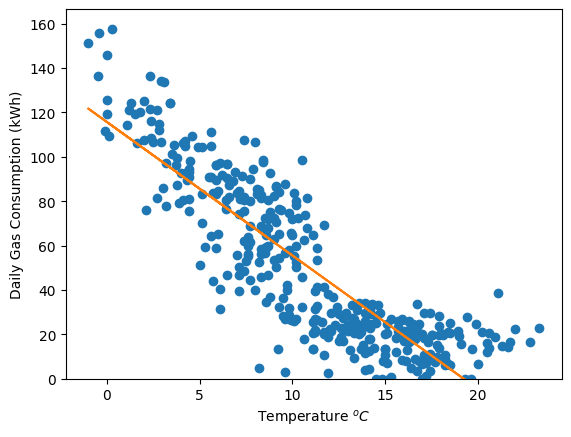

In [15]:
lr_gas = LinearRegression()
lr_gas.fit(df["temp"].values.reshape(-1, 1), df["Gas"])

plt.scatter(df["temp"], df["Gas"])
plt.plot(df["temp"], lr_gas.predict(df["temp"].values.reshape(-1, 1)), color="C1");
plt.xlabel("Temperature $^oC$")
plt.ylabel("Daily Gas Consumption (kWh)")
plt.ylim(bottom=0)
print(f'R2:{round(lr_gas.score(df["temp"].values.reshape(-1, 1), df["Gas"]),3)}')
print(f"coeff: {lr_gas.coef_} intercept: {lr_gas.intercept_}")

R2 Score (Segment 1): 0.623
R2 Score (Segment 2): 0.078
coeff 1: [-7.98658249] intercept 1: 130.114244815689
coeff 2: [-0.96653959] intercept 2: 34.26104667691706


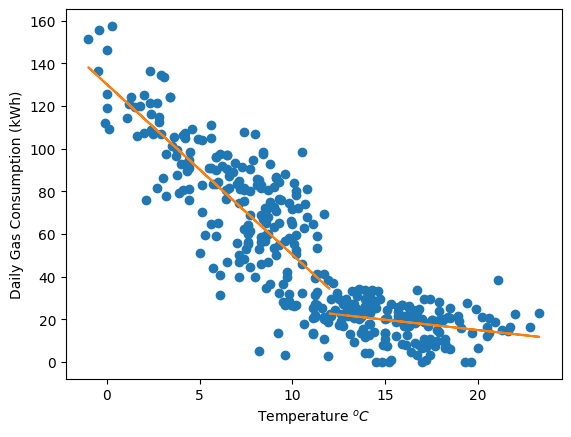

In [16]:
df_gas_weather = df[["Gas", "temp"]]
df_gas_weather_1, df_gas_weather_2 = df[df_gas_weather["temp"]<=12],df[df_gas_weather["temp"]>=12]

lr_gas_seg1, lr_gas_seg2 = LinearRegression(), LinearRegression()

lr_gas_seg1.fit(df_gas_weather_1["temp"].values.reshape(-1, 1), df_gas_weather_1["Gas"])
lr_gas_seg2.fit(df_gas_weather_2["temp"].values.reshape(-1, 1), df_gas_weather_2["Gas"])


plt.scatter(df["temp"], df["Gas"])
plt.plot(df_gas_weather_1["temp"], lr_gas_seg1.predict(df_gas_weather_1["temp"].values.reshape(-1, 1)), color="C1");
plt.plot(df_gas_weather_2["temp"], lr_gas_seg2.predict(df_gas_weather_2["temp"].values.reshape(-1, 1)), color="C1");
plt.xlabel("Temperature $^oC$")
plt.ylabel("Daily Gas Consumption (kWh)")

print(f'R2 Score (Segment 1): {round(lr_gas_seg1.score(df_gas_weather_1["temp"].values.reshape(-1, 1), df_gas_weather_1["Gas"]),3)}')
print(f'R2 Score (Segment 2): {round(lr_gas_seg2.score(df_gas_weather_2["temp"].values.reshape(-1, 1), df_gas_weather_2["Gas"]),3)}')

print(f"coeff 1: {lr_gas_seg1.coef_} intercept 1: {lr_gas_seg1.intercept_}")
print(f"coeff 2: {lr_gas_seg2.coef_} intercept 2: {lr_gas_seg2.intercept_}")

In [17]:
print(f'R2 Score (Segment 1): {round(lr_gas.score(df_gas_weather_1["temp"].values.reshape(-1, 1), df_gas_weather_1["Gas"]),3)}')
print(f'R2 Score (Segment 2): {round(lr_gas.score(df_gas_weather_2["temp"].values.reshape(-1, 1), df_gas_weather_2["Gas"]),3)}')
print(f"PCC Segment 1: {df_gas_weather_1['Gas'].corr(df_gas_weather_1['Electricity'])}")
print(f"PCC Segment 2: {df_gas_weather_2['Gas'].corr(df_gas_weather_2['Electricity'])}")

R2 Score (Segment 1): 0.585
R2 Score (Segment 2): -2.066
PCC Segment 1: 0.2900888324794519
PCC Segment 2: 0.4826051420330386


# 2022 Forecasting

In [18]:
df_2022 = pd.read_excel("/work/data_2022.xlsx")
df_2022 = df_2022.set_index("Date_local")
df_2022["Gas (kwh)"] = (df_2022["Gas (kwh)"] * 1.02264 * 39.1/3.6).round(3)
temp_2022 = df_2022["Temperature"]
df_2022

,Electricity (kwh),Gas (kwh),Temperature
Date_local,,,
2022-01-01,7.449,41.018,12.7
2022-01-02,8.452,46.305,9.9
2022-01-03,11.618,90.156,8.7
2022-01-04,10.894,84.769,3.2
2022-01-05,8.712,107.405,3.0
...,...,...,...
2022-12-27,6.756,101.929,5.5
2022-12-28,13.241,70.452,7.5
2022-12-29,9.882,88.723,7.4


In [20]:
gas_pred=[]
for temp in temp_2022:
    if temp <= 12:
        pred = lr_gas_seg1.predict([[temp]])[0]
    else:
        pred = lr_gas_seg2.predict([[temp]])[0]
    gas_pred.append(pred)

elec_pred = [df["Electricity"].mean()]*len(df_2022)

df_2022["Gas (Forecast)"] = gas_pred
df_2022["Electricity (Forecast)"] = elec_pred

df_2022

,Electricity (kwh),Gas (kwh),Temperature,Gas (Forecast),Electricity (Forecast)
Date_local,,,,,
2022-01-01,7.449,41.018,12.7,21.985994,8.726611
2022-01-02,8.452,46.305,9.9,51.047078,8.726611
2022-01-03,11.618,90.156,8.7,60.630977,8.726611
2022-01-04,10.894,84.769,3.2,104.557181,8.726611
2022-01-05,8.712,107.405,3.0,106.154497,8.726611
...,...,...,...,...,...
2022-12-27,6.756,101.929,5.5,86.188041,8.726611
2022-12-28,13.241,70.452,7.5,70.214876,8.726611
2022-12-29,9.882,88.723,7.4,71.013534,8.726611


## Using mean electricity

In [21]:
df_2022_clean1 = df_2022.drop(df_2022.loc["2022-07-09":"2022-09-29"].index, axis=0)
r2_gas = r2_score(df_2022_clean1['Gas (kwh)'],df_2022_clean1['Gas (Forecast)'])
r2_elec = r2_score(df_2022_clean1['Electricity (kwh)'],df_2022_clean1['Electricity (Forecast)'])
rmse_gas = mean_squared_error(df_2022_clean1['Electricity (kwh)'],df_2022_clean1['Electricity (Forecast)'])**0.5
rmse_elec = mean_squared_error(df_2022_clean1['Gas (kwh)'],df_2022_clean1['Gas (Forecast)'])**0.5


print(f"Forecast: Gas {round(df_2022_clean1['Gas (Forecast)'].sum())} kWh, Electricity {round(df_2022_clean1['Electricity (Forecast)'].sum())} kWh")
print(f"Actual: Gas {round(df_2022_clean1['Gas (kwh)'].sum())} kWh, Electricity {round(df_2022_clean1['Electricity (kwh)'].sum())} kWh")
print(f"R2 Score: Gas {round(r2_gas, 3)}, Electricity:  {round(r2_elec, 3)}")
print(f"RMSE Score: Gas {round(rmse_gas, 3)}, Electricity:  {round(rmse_elec, 3)}")


Forecast: Gas 16152 kWh, Electricity 2461 kWh
Actual: Gas 14641 kWh, Electricity 2431 kWh
R2 Score: Gas 0.689, Electricity:  -0.003
RMSE Score: Gas 1.972, Electricity:  19.392


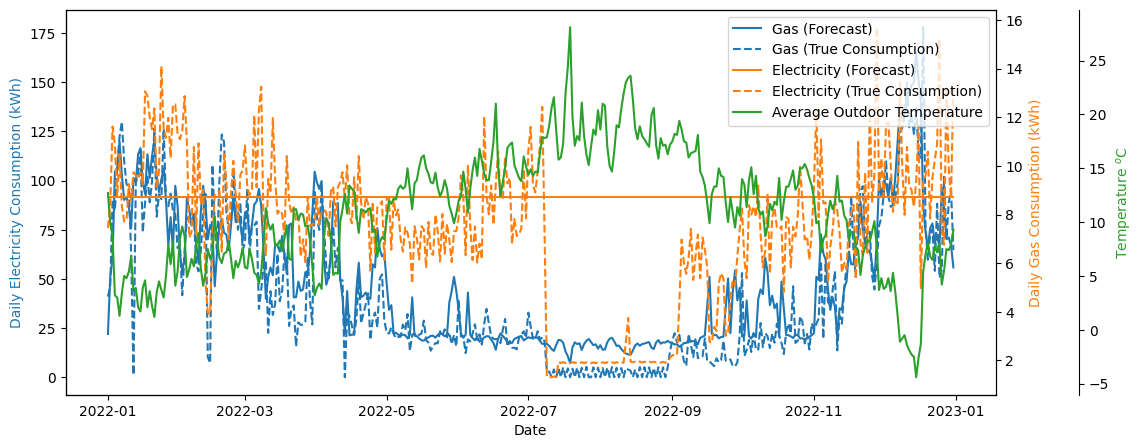

In [22]:
fig, ax1 = plt.subplots(1,1,figsize=(12, 5))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

g = ax1.plot(df_2022.index, df_2022["Gas (Forecast)"], label = "Gas (Forecast)", color="C0")
g1 = ax1.plot(df_2022.index, df_2022["Gas (kwh)"], linestyle = "--", label = "Gas (True Consumption)", color="C0")

e = ax2.plot(df_2022.index, df_2022["Electricity (Forecast)"], label = "Electricity (Forecast)", color="C1")
e1 = ax2.plot(df_2022.index, df_2022["Electricity (kwh)"],linestyle = "--", label = "Electricity (True Consumption)", color="C1")

w1 = ax3.plot(df_2022.index, df_2022["Temperature"], label="Average Outdoor Temperature", color="C2")

ax1.set_xlabel("Date")
ax1.set_ylabel("Daily Electricity Consumption (kWh)")
ax2.set_ylabel("Daily Gas Consumption (kWh)")
ax3.set_ylabel("Temperature $^o$C")

ax3.spines['right'].set_position(('outward', 60))

plt.legend(handles=g+g1+e+e1+w, loc='best')

ax1.yaxis.label.set_color(g[0].get_color())
ax2.yaxis.label.set_color(e[0].get_color())
ax3.yaxis.label.set_color(w[0].get_color());

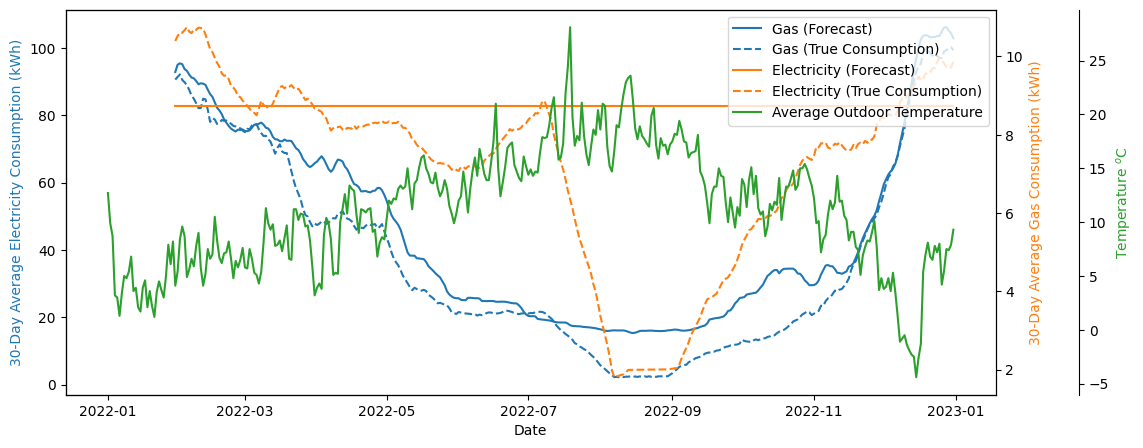

In [23]:
fig, ax1 = plt.subplots(1,1,figsize=(12, 5))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

g = ax1.plot(df_2022.index, df_2022["Gas (Forecast)"].rolling(30).mean(), label = "Gas (Forecast)", color="C0")
g1 = ax1.plot(df_2022.index, df_2022["Gas (kwh)"].rolling(30).mean(), linestyle = "--", label = "Gas (True Consumption)", color="C0")

e = ax2.plot(df_2022.index, df_2022["Electricity (Forecast)"].rolling(30).mean(), label = "Electricity (Forecast)", color="C1")
e1 = ax2.plot(df_2022.index, df_2022["Electricity (kwh)"].rolling(30).mean(),linestyle = "--", label = "Electricity (True Consumption)", color="C1")

w1 = ax3.plot(df_2022.index, df_2022["Temperature"], label="Average Outdoor Temperature", color="C2")

ax1.set_xlabel("Date")
ax1.set_ylabel("30-Day Average Electricity Consumption (kWh)")
ax2.set_ylabel("30-Day Average Gas Consumption (kWh)")
ax3.set_ylabel("Temperature $^o$C")

ax3.spines['right'].set_position(('outward', 60))

plt.legend(handles=g+g1+e+e1+w, loc='best')

ax1.yaxis.label.set_color(g[0].get_color())
ax2.yaxis.label.set_color(e[0].get_color())
ax3.yaxis.label.set_color(w[0].get_color());

## Using regressed electricity

In [24]:
df_2022["Electricity (Forecast)"] = lr_elec_clean.predict(df_2022["Temperature"].values.reshape(-1, 1))

In [25]:
df_2022_clean2 = df_2022.drop(df_2022.loc["2022-07-09":"2022-09-29"].index, axis=0)
r2_gas = r2_score(df_2022_clean2['Gas (kwh)'],df_2022_clean2['Gas (Forecast)'])
r2_elec = r2_score(df_2022_clean2['Electricity (kwh)'],df_2022_clean2['Electricity (Forecast)'])
rmse_gas = mean_squared_error(df_2022_clean2['Gas (kwh)'],df_2022_clean2['Gas (Forecast)'])**0.5
rmse_elec = mean_squared_error(df_2022_clean2['Electricity (kwh)'],df_2022_clean2['Electricity (Forecast)'])**0.5

print(f"Forecast: Gas {round(df_2022_clean2['Gas (Forecast)'].sum())} kWh, Electricity {round(df_2022_clean2['Electricity (Forecast)'].sum())} kWh")
print(f"Actual: Gas {round(df_2022_clean2['Gas (kwh)'].sum())} kWh, Electricity {round(df_2022_clean2['Electricity (kwh)'].sum())} kWh")
print(f"R2 Score: Gas {round(r2_gas, 3)}, Electricity:  {round(r2_elec, 3)}")
print(f"RMSE Score: Gas {round(rmse_gas, 3)}, Electricity:  {round(rmse_elec, 3)}")

Forecast: Gas 16152 kWh, Electricity 2443 kWh
Actual: Gas 14641 kWh, Electricity 2431 kWh
R2 Score: Gas 0.689, Electricity:  0.043
RMSE Score: Gas 19.392, Electricity:  1.927


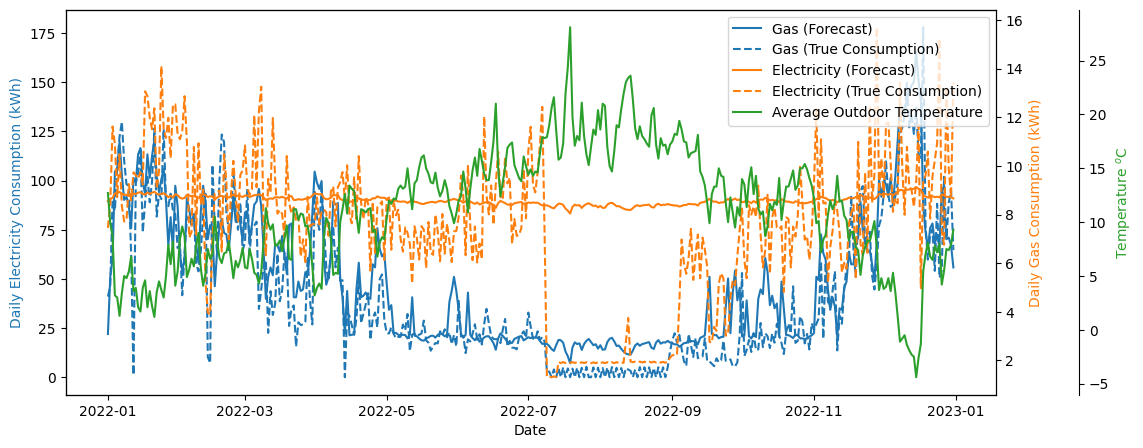

In [26]:
fig, ax1 = plt.subplots(1,1,figsize=(12, 5))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

g = ax1.plot(df_2022.index, df_2022["Gas (Forecast)"], label = "Gas (Forecast)", color="C0")
g1 = ax1.plot(df_2022.index, df_2022["Gas (kwh)"], linestyle = "--", label = "Gas (True Consumption)", color="C0")

e = ax2.plot(df_2022.index, df_2022["Electricity (Forecast)"], label = "Electricity (Forecast)", color="C1")
e1 = ax2.plot(df_2022.index, df_2022["Electricity (kwh)"],linestyle = "--", label = "Electricity (True Consumption)", color="C1")

w1 = ax3.plot(df_2022.index, df_2022["Temperature"], label="Average Outdoor Temperature", color="C2")

ax1.set_xlabel("Date")
ax1.set_ylabel("Daily Electricity Consumption (kWh)")
ax2.set_ylabel("Daily Gas Consumption (kWh)")
ax3.set_ylabel("Temperature $^o$C")

ax3.spines['right'].set_position(('outward', 60))

plt.legend(handles=g+g1+e+e1+w, loc='best')

ax1.yaxis.label.set_color(g[0].get_color())
ax2.yaxis.label.set_color(e[0].get_color())
ax3.yaxis.label.set_color(w[0].get_color());

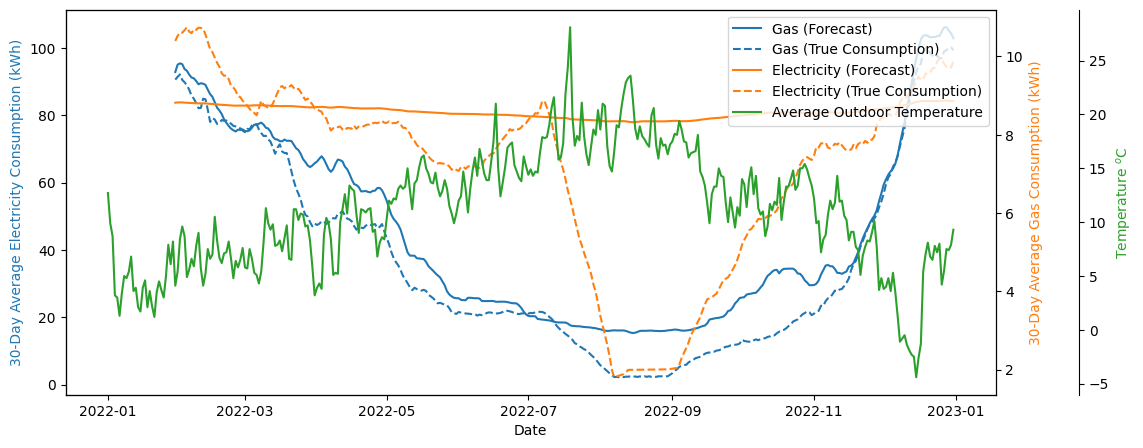

In [27]:
fig, ax1 = plt.subplots(1,1,figsize=(12, 5))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

g = ax1.plot(df_2022.index, df_2022["Gas (Forecast)"].rolling(30).mean(), label = "Gas (Forecast)", color="C0")
g1 = ax1.plot(df_2022.index, df_2022["Gas (kwh)"].rolling(30).mean(), linestyle = "--", label = "Gas (True Consumption)", color="C0")

e = ax2.plot(df_2022.index, df_2022["Electricity (Forecast)"].rolling(30).mean(), label = "Electricity (Forecast)", color="C1")
e1 = ax2.plot(df_2022.index, df_2022["Electricity (kwh)"].rolling(30).mean(),linestyle = "--", label = "Electricity (True Consumption)", color="C1")

w1 = ax3.plot(df_2022.index, df_2022["Temperature"], label="Average Outdoor Temperature", color="C2")

ax1.set_xlabel("Date")
ax1.set_ylabel("30-Day Average Electricity Consumption (kWh)")
ax2.set_ylabel("30-Day Average Gas Consumption (kWh)")
ax3.set_ylabel("Temperature $^o$C")

ax3.spines['right'].set_position(('outward', 60))

plt.legend(handles=g+g1+e+e1+w, loc='best')

ax1.yaxis.label.set_color(g[0].get_color())
ax2.yaxis.label.set_color(e[0].get_color())
ax3.yaxis.label.set_color(w[0].get_color());

# 2024 Forecasting

In [28]:
df.index=pd.DatetimeIndex(df.index)
df

,Gas,Electricity,temp
date,,,
2023-01-01,59.278095,9.109,8.6
2023-01-02,59.478021,7.714,5.3
2023-01-03,97.341806,10.620,6.1
2023-01-04,65.820122,9.606,9.9
2023-01-05,55.401749,8.804,10.1
...,...,...,...
2024-01-11,124.131907,8.284,3.4
2024-01-12,105.238888,11.396,3.6
2024-01-13,97.386234,8.824,3.2


In [29]:
df_2024 = df["temp"]
df_2024 = df_2024.loc["2024-01-01":]

df_2023 = df["temp"]
df_2023 = df_2023.loc["2023-01-16":"2023-12-31"]+0.2
df_2023.index = df_2023.index + pd.offsets.DateOffset(years=1)

df_2024 = pd.concat([df_2024, df_2023])
df_2024

date
2024-01-01    8.0
2024-01-02    8.4
2024-01-03    8.1
2024-01-04    5.9
2024-01-05    5.6
             ... 
2024-12-27    7.9
2024-12-28    9.3
2024-12-29    7.9
2024-12-30    7.6
2024-12-31    6.6
Name: temp, Length: 363, dtype: float64

In [30]:
gas_forecast = []
for temp in df_2024:
    if temp <= 12:
        pred = lr_gas_seg1.predict([[temp]])[0]
    else:
        pred = lr_gas_seg2.predict([[temp]])[0]
    gas_forecast.append(pred)

elec_forecast = lr_elec_clean.predict(df_2024.values.reshape(-1,1))

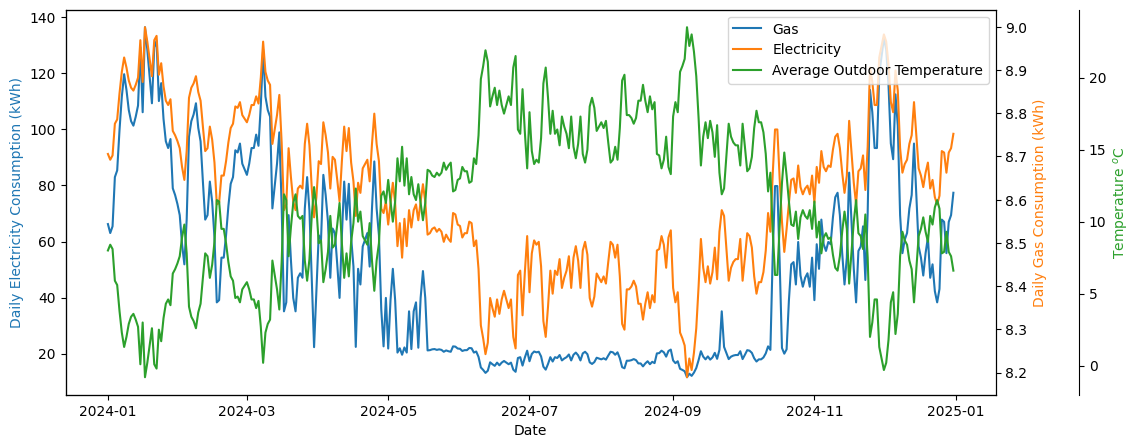

In [31]:
fig, ax1 = plt.subplots(1,1,figsize=(12, 5))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

g = ax1.plot(df_2024.index, gas_forecast, label = "Gas", color="C0")
e = ax2.plot(df_2024.index, elec_forecast, label = "Electricity", color="C1")
w = ax3.plot(df_2024.index, df_2024, label="Average Outdoor Temperature", color="C2")

ax1.set_xlabel("Date")
ax1.set_ylabel("Daily Electricity Consumption (kWh)")
ax2.set_ylabel("Daily Gas Consumption (kWh)")
ax3.set_ylabel("Temperature $^o$C")

ax3.spines['right'].set_position(('outward', 60))

plt.legend(handles=g+e+w, loc='best')

ax1.yaxis.label.set_color(g[0].get_color())
ax2.yaxis.label.set_color(e[0].get_color())
ax3.yaxis.label.set_color(w[0].get_color());

In [32]:
print(f"Annual Electricity Consumption: {round(sum(elec_forecast),0)}")
print(f"Annual Gas Consumption: {round(sum(gas_forecast),0)}")

Annual Electricity Consumption: 3122.0
Annual Gas Consumption: 17750.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=81ea5747-df50-4b7a-89ee-a86b13f40626' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>